# Sonar

- Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.


- The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).


- Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [62]:
df= pd.read_csv("sonar.all-data.csv")

In [63]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [64]:
df.shape

(208, 61)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [67]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [68]:
df["Label"].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [69]:
# Changing trget value To Numeric:

df["Label"] = df["Label"].map({"M" : 1, "R" : 0})

In [70]:
df["Label"].value_counts()

1    111
0     97
Name: Label, dtype: int64

### Train Test Split:

In [71]:
# Features:

x = df.drop("Label", axis= 1)

In [72]:
x.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [73]:
y = df["Label"]

In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


### Scalling:

In [77]:
sc = StandardScaler()

In [78]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,-0.412569,0.000871,1.733748,0.817630,-0.972942,-0.956700,0.312602,0.695788,0.064470,-0.201801,...,-0.151489,-0.394444,-1.061345,0.079350,-0.894390,-0.469589,0.258466,-0.352895,-0.133623,-0.797984
1,-0.416925,-0.079822,-0.760921,-0.910844,-0.687322,0.988321,1.286011,0.368363,0.454054,0.449789,...,0.338868,-0.154637,-0.072748,1.296102,-0.850330,0.418061,-0.200710,0.648777,1.952671,1.831159
2,0.371428,0.111824,-0.287410,-0.600947,0.159622,0.497808,-0.111249,-0.845935,-1.406530,-1.166571,...,-0.846161,-0.415296,0.870222,0.744319,-0.145364,-0.207329,1.084983,-0.180193,0.033280,0.071808
3,0.550005,0.172344,0.526137,-1.036405,-1.103851,-0.052316,-0.283691,-0.366575,0.431792,0.134384,...,-0.396667,-1.072158,-1.015717,-0.033837,0.427421,0.135627,-0.274178,-0.283814,-0.767857,0.269488
4,1.042181,0.226140,-0.722786,-0.603619,-0.770628,0.206566,0.043465,-0.239374,-0.462110,0.334759,...,-0.053417,0.304124,-1.122182,-0.797844,-0.424413,0.175975,1.176818,1.045992,0.016590,-0.659608


In [79]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,0.097029,-0.022665,-0.614736,-0.777268,-0.562363,-0.655238,-0.469025,-0.481999,0.631293,0.778553,...,0.894606,0.721179,-0.498605,-0.529026,-0.071930,0.175975,-0.035406,-0.611948,-0.350598,-0.857288
1,0.066540,0.824616,0.770837,1.076768,1.736484,2.119226,1.524528,0.767633,-0.290009,-0.909794,...,-0.061590,-1.040879,0.763758,-0.514878,1.778605,-0.086286,1.397223,-0.491057,2.069503,0.170648
2,-0.625991,-0.496738,-1.011977,-1.095179,-1.040380,-1.556215,-0.920274,-0.503199,-0.866250,-0.788827,...,-1.124030,-0.717661,-0.468187,0.079350,-1.158752,-1.175675,-0.935391,-0.318355,-0.617644,-0.323552
3,-0.443058,-0.752268,-1.212186,-1.007018,-0.631784,-0.982247,-1.400531,-0.754067,-0.342238,-0.766563,...,-0.699054,0.960985,2.315095,0.532095,2.087028,-0.792371,-1.063961,-0.508327,0.216874,0.407864
4,0.558716,-0.311816,0.624653,0.018845,-0.496908,-1.132126,-0.997631,-0.311219,-0.480091,0.164811,...,0.159071,0.898427,-0.985299,-1.250588,-0.380352,1.043451,0.589073,-0.473787,0.150113,-0.402624


### Model:

In [80]:
knn = KNeighborsClassifier()

In [81]:
param_dict = {"n_neighbors" : list(range(1,25)), 
             "metric" : ["euclidean", "cosine", "manhattan","minkowski"]}

In [82]:
grid_model = GridSearchCV(estimator= knn, param_grid= param_dict, cv= 5)

In [83]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [84]:
grid_model.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [85]:
grid_model.best_params_

{'metric': 'cosine', 'n_neighbors': 1}

In [86]:
grid_model.best_score_

0.8554367201426025

### Model Evaluation:

In [87]:
pred = grid_model.predict(x_test)

In [88]:
accuracy_score(y_test, pred)

0.9761904761904762

In [90]:
precision_score(y_test, pred)

0.9629629629629629

In [91]:
recall_score(y_test,pred)

1.0

In [92]:
confusion_matrix(y_test,pred)

array([[15,  1],
       [ 0, 26]], dtype=int64)

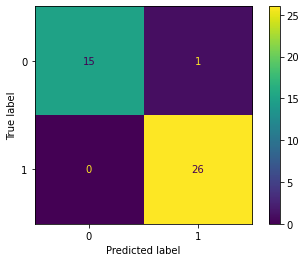

In [93]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        26

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.97        42
weighted avg       0.98      0.98      0.98        42



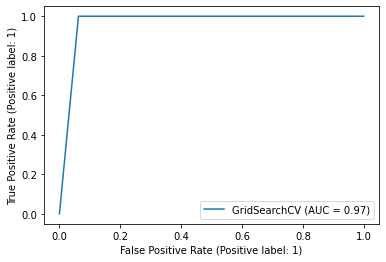

In [95]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

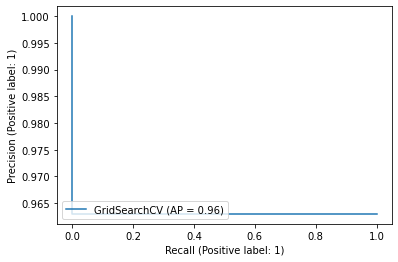

In [96]:
plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()

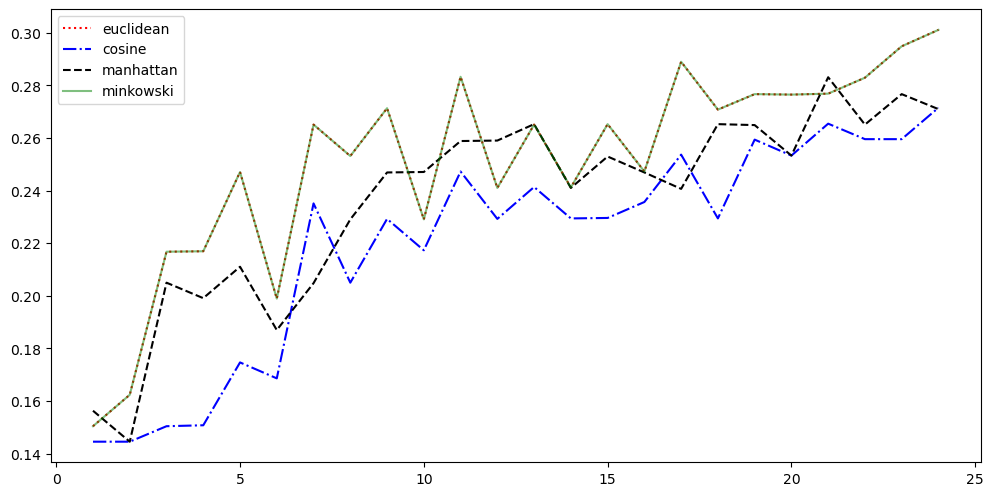

In [98]:
# We can also Plot Error rates for Different Values of K for Different Distance Metrics:

results = pd.DataFrame(grid_model.cv_results_)

plt.figure(figsize=(12,6), dpi= 100)

plt.plot(results[results["param_metric"] == "euclidean"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "euclidean"]["mean_test_score"], color= "red", linestyle= ":", label= "euclidean")

plt.plot(results[results["param_metric"] == "cosine"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "cosine"]["mean_test_score"], color= "blue", linestyle= "-.", label= "cosine")

plt.plot(results[results["param_metric"] == "manhattan"]["param_n_neighbors"],
     1 - results[results["param_metric"] == "manhattan"]["mean_test_score"], color= "black", linestyle= "--", label= "manhattan")

plt.plot(results[results["param_metric"] == "minkowski"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "minkowski"]["mean_test_score"], color= "green", linestyle= "-", label= "minkowski",
        alpha= 0.5)

plt.legend()

plt.show()